In [84]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# data = sns.load_dataset("tips")

In [85]:
# ScraperV3.py which utalizes BeautifulSoup to scrape prices of MacBooks

from bs4 import BeautifulSoup
import requests

# Pull the results
url = "https://www.backmarket.com/en-us/l/apple-macbook/a059fa0c-b88d-4095-b6a2-dcbeb9dd5b33"
results = requests.get(url)

doc=BeautifulSoup(results.text, "html.parser")

# Create an empty array for containing all the Laptop dictionaries
Laptops_array = []


# Full Laptop details/Product card
Laptops = doc.find_all(class_="productCard col-span-full")

# Loop to go through all laptops/product cards on the page. Add each definition to a Laptop dictionary
for Laptop in Laptops:
    Laptop_dict = {}

    # Models and Prices were found through the listed class.
    Models = Laptop.find_all(class_="body-1-bold mb-1 text-black text-left flex-grow")
    for Model in Models:
        Laptop_dict['Model'] = Model.string.strip()

    Prices = Laptop.find_all(class_="body-2-bold text-black")
    for Price in Prices:
        Laptop_dict['Price'] = Price.string.strip()

    # Processors, Keyboards, RAM, and Storage fields were all tied HTML headers s
    Processors = Laptop.find_all("dd")[0]
    for Processor in Processors:
        Laptop_dict['Processor'] = Processor.string.strip()

    Keyboards = Laptop.find_all("dd")[1]
    for Keyboard in Keyboards:
        Laptop_dict['Keyboard'] = Keyboard.string.strip()

    RAMs = Laptop.find_all("dd")[2]
    for RAM in RAMs:
        Laptop_dict['RAM'] = RAM.string.strip()

    Storages = Laptop.find_all("li")[0]
    for Storage in Storages:
        Laptop_dict['Storage'] = Storage.string.strip()

# Append and add each laptop dictionary in the request/site to the Laptop array
    Laptops_array.append(Laptop_dict)

for laptop in Laptops_array:
    print(laptop)

{'Model': 'Apple MacBook Pro 16” (Mid-2019)', 'Price': '$539.00', 'Processor': 'Core i9 2.4 GHz', 'Keyboard': 'QWERTY - English', 'RAM': '32GB', 'Storage': '512 GB'}
{'Model': 'Apple MacBook Pro 13.3” (Mid-2020)', 'Price': '$533.57', 'Processor': 'Core i5 2.0 GHz', 'Keyboard': 'QWERTY - English', 'RAM': '16GB', 'Storage': '512 GB'}
{'Model': 'Apple MacBook Pro 16” (Mid-2019)', 'Price': '$514.99', 'Processor': 'Core i7 2.6 GHz', 'Keyboard': 'QWERTY - English', 'RAM': '16GB', 'Storage': '512 GB'}
{'Model': 'Apple MacBook Air 13.3” (Late 2020)', 'Price': '$516.40', 'Processor': 'Apple M1', 'Keyboard': 'QWERTY - English', 'RAM': '8GB', 'Storage': '128 GB'}
{'Model': 'Apple MacBook Pro 13.3” (Mid-2020)', 'Price': '$518.99', 'Processor': 'Core i7 2.3 GHz', 'Keyboard': 'QWERTY - English', 'RAM': '16GB', 'Storage': '512 GB'}
{'Model': 'Apple MacBook Air 13.3” (Mid-2020)', 'Price': '$393.00', 'Processor': 'Core i3 1.1 GHz', 'Keyboard': 'QWERTY - English', 'RAM': '8GB', 'Storage': '128 GB'}
{'Mo

In [86]:
# Convert scraped data to a DataFrame
LaptopDF = pd.DataFrame(Laptops_array)

LaptopDF['Price'] = LaptopDF['Price'].str.replace('$', '')
LaptopDF['Price'] = LaptopDF['Price'].replace({',': ''}, regex=True).astype(float)

sorted_LaptopDF = LaptopDF.sort_values(by=['Price'], ascending=False)
print(sorted_LaptopDF)

                                   Model    Price        Processor  \
20   Apple MacBook Pro 16.2” (Late 2021)  1249.00     Apple M1 Pro   
16   Apple MacBook Pro 14.2” (Late 2021)  1149.97     Apple M1 Pro   
8    Apple MacBook Pro 13.3” (Late 2020)   979.00         Apple M1   
22    Apple MacBook Air 15.3” (Mid-2023)   849.00         Apple M2   
18    Apple MacBook Air 13.3” (Mid-2022)   835.92         Apple M2   
12      Apple MacBook Pro 16” (Mid-2019)   756.00  Core i9 2.4 GHz   
25      Apple MacBook Pro 16” (Mid-2019)   601.99  Core i9 2.3 GHz   
17      Apple MacBook Pro 16” (Mid-2019)   557.40  Core i9 2.3 GHz   
0       Apple MacBook Pro 16” (Mid-2019)   539.00  Core i9 2.4 GHz   
1     Apple MacBook Pro 13.3” (Mid-2020)   533.57  Core i5 2.0 GHz   
4     Apple MacBook Pro 13.3” (Mid-2020)   518.99  Core i7 2.3 GHz   
3    Apple MacBook Air 13.3” (Late 2020)   516.40         Apple M1   
2       Apple MacBook Pro 16” (Mid-2019)   514.99  Core i7 2.6 GHz   
13    Apple MacBook 

In [87]:
MacBookPros = sorted_LaptopDF.query('Model.str.startswith("Apple MacBook Pro")',engine="python")
print (MacBookPros)

                                  Model    Price        Processor  \
20  Apple MacBook Pro 16.2” (Late 2021)  1249.00     Apple M1 Pro   
16  Apple MacBook Pro 14.2” (Late 2021)  1149.97     Apple M1 Pro   
8   Apple MacBook Pro 13.3” (Late 2020)   979.00         Apple M1   
12     Apple MacBook Pro 16” (Mid-2019)   756.00  Core i9 2.4 GHz   
25     Apple MacBook Pro 16” (Mid-2019)   601.99  Core i9 2.3 GHz   
17     Apple MacBook Pro 16” (Mid-2019)   557.40  Core i9 2.3 GHz   
0      Apple MacBook Pro 16” (Mid-2019)   539.00  Core i9 2.4 GHz   
1    Apple MacBook Pro 13.3” (Mid-2020)   533.57  Core i5 2.0 GHz   
4    Apple MacBook Pro 13.3” (Mid-2020)   518.99  Core i7 2.3 GHz   
2      Apple MacBook Pro 16” (Mid-2019)   514.99  Core i7 2.6 GHz   
13   Apple MacBook Pro 13.3” (Mid-2020)   506.99  Core i7 2.3 GHz   
26   Apple MacBook Pro 15.4” (Mid-2019)   499.00  Core i7 2.6 GHz   
9     Apple MacBook Pro 16” (Late 2019)   473.99  Core i7 2.6 GHz   
15   Apple MacBook Pro 13.3” (Mid-

In [88]:
MacBookAirs = sorted_LaptopDF.query('Model.str.startswith("Apple MacBook Air")',engine="python")
print (MacBookAirs)

                                   Model   Price        Processor  \
22    Apple MacBook Air 15.3” (Mid-2023)  849.00         Apple M2   
18    Apple MacBook Air 13.3” (Mid-2022)  835.92         Apple M2   
3    Apple MacBook Air 13.3” (Late 2020)  516.40         Apple M1   
19    Apple MacBook Air 13.3” (Mid-2020)  394.24  Core i5 1.1 GHz   
5     Apple MacBook Air 13.3” (Mid-2020)  393.00  Core i3 1.1 GHz   
21    Apple MacBook Air 13.3” (Mid-2019)  355.00  Core i5 1.6 GHz   
27   Apple MacBook Air 13.3” (Late 2018)  350.00  Core i5 1.6 GHz   
23    Apple MacBook Air 13.3” (Mid-2017)  212.97  Core i7 2.2 GHz   
6   Apple MacBook Air 11.6” (Early 2015)  109.17  Core i5 1.6 GHz   
10    Apple MacBook Air 11.6” (Mid-2014)   89.99  Core i5 1.4 GHz   

            Keyboard   RAM Storage  
22  QWERTY - English   8GB  256 GB  
18  QWERTY - English   8GB  256 GB  
3   QWERTY - English   8GB  128 GB  
19  QWERTY - English   8GB  256 GB  
5   QWERTY - English   8GB  128 GB  
21  QWERTY - Engli

In [89]:
M1_MacBooks = sorted_LaptopDF.query('Processor.str.startswith("Apple")',engine="python")
print(M1_MacBooks)

                                  Model    Price     Processor  \
20  Apple MacBook Pro 16.2” (Late 2021)  1249.00  Apple M1 Pro   
16  Apple MacBook Pro 14.2” (Late 2021)  1149.97  Apple M1 Pro   
8   Apple MacBook Pro 13.3” (Late 2020)   979.00      Apple M1   
22   Apple MacBook Air 15.3” (Mid-2023)   849.00      Apple M2   
18   Apple MacBook Air 13.3” (Mid-2022)   835.92      Apple M2   
3   Apple MacBook Air 13.3” (Late 2020)   516.40      Apple M1   

            Keyboard   RAM Storage  
20  QWERTY - English  16GB  512 GB  
16  QWERTY - English  16GB  512 GB  
8   QWERTY - English  16GB  256 GB  
22  QWERTY - English   8GB  256 GB  
18  QWERTY - English   8GB  256 GB  
3   QWERTY - English   8GB  128 GB  


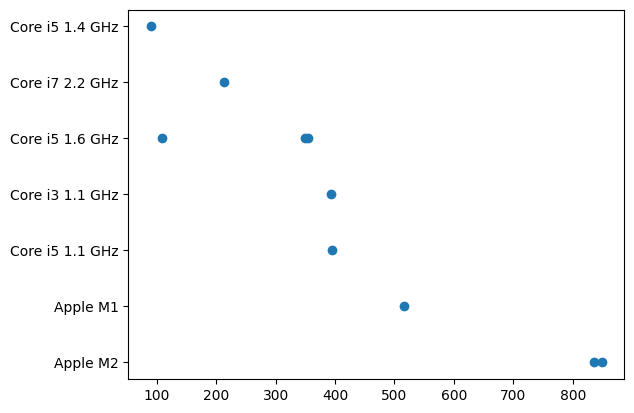

In [90]:
#plt.scatter(M1_MacBooks.Price,M1_MacBooks.Processor)
plt.scatter(MacBookAirs.Price,MacBookAirs.Processor)